# 1. Understanding the Business Problem
Understand the context and the impact of cancellations on hotel management. Define what a successful prediction model would look like in terms of metrics (accuracy, recall, etc.) and business impact.

# 2. Data Exploration and Understanding
- **Loading Data**: Read the data into an environment where you can explore it.
- **Exploratory Data Analysis (EDA)**: Understand the basic statistics and visualizations of data. Check for null values and outliers.

# 3. Data Preprocessing
- **Data Cleaning**: Handle missing values, outliers, and errors in the data.
- **Feature Engineering**: Create new variables that might be relevant for prediction.
- **Data Encoding**: Convert categorical variables into a format that’s suitable for machine learning models.
- **Data Scaling**: Scale the data to prepare it for machine learning models.

# 4. Model Selection and Development
- **Model Selection**: Choose machine learning models suitable for the prediction task.
- **Model Development**: Train the selected models using the training data.

# 5. Model Evaluation
- **Evaluation Metrics**: Choose appropriate metrics (accuracy, precision, recall, F1-score, etc.) for evaluating the model.
- **Cross-Validation**: Use cross-validation to ensure that your model is not overfitting or underfitting.
- **Model Comparison**: Compare different models to choose the best performing one.

# 6. Model Optimization
- **Hyperparameter Tuning**: Tune the model parameters for better performance.
- **Feature Importance Analysis**: Analyze which features are most influential in making 
predictions.



Source: https://www.kaggle.com/datasets/arezaei81/hotel-bookingcvs

Target variable: is_cancelled

| Index | Variable                      | Description                                                      |
|-------|-------------------------------|------------------------------------------------------------------|
| 1     | hotel                         | Type of hotel (Resort Hotel, City Hotel)                          |
| 2     | is_canceled                   | Reservation cancellation status (0 = not canceled, 1 = canceled)  |
| 3     | lead_time                     | Number of days between booking and arrival                        |
| 4     | arrival_date_year             | Year of arrival                                                   |
| 5     | arrival_date_month            | Month of arrival                                                  |
| 6     | arrival_date_week_number      | Week number of the year for arrival                               |
| 7     | arrival_date_day_of_month     | Day of the month of arrival                                       |
| 8     | stays_in_weekend_nights       | Number of weekend nights (Saturday and Sunday) the guest stayed or booked |
| 9     | stays_in_week_nights          | Number of week nights the guest stayed or booked                  |
| 10    | adults                        | Number of adults                                                  |
| 11    | children                      | Number of children                                                |
| 12    | babies                        | Number of babies                                                  |
| 13    | meal                          | Type of meal booked (BB, FB, HB, SC, Undefined)                   |
| 14    | country                       | Country of origin of the guest                                    |
| 15    | market_segment                | Market segment designation                                        |
| 16    | distribution_channel          | Booking distribution channel                                      |
| 17    | is_repeated_guest             | If the guest is a repeat customer (0 = not repeated, 1 = repeated) |
| 18    | previous_cancellations        | Number of previous bookings that were canceled by the customer    |
| 19    | previous_bookings_not_canceled| Number of previous bookings that were not canceled by the customer|
| 20    | reserved_room_type            | Type of reserved room                                             |
| 21    | assigned_room_type            | Type of assigned room                                             |
| 22    | booking_changes               | Number of changes made to the booking                             |
| 23    | deposit_type                  | Type of deposit made (No Deposit, Refundable, Non Refund)         |
| 24    | agent                         | ID of the travel agent responsible for the booking                |
| 25    | company                       | ID of the company responsible for the booking                     |
| 26    | days_in_waiting_list          | Number of days the booking was in the waiting list                |
| 27    | customer_type                 | Type of customer (Transient, Contract, Transient-Party, Group)    |
| 28    | adr                           | Average Daily Rate                                                |
| 29    | required_car_parking_spaces   | Number of car parking spaces required                             |
| 30    | total_of_special_requests     | Number of special requests made                                   |
| 31    | reservation_status            | Last reservation status (Check-Out, Canceled, No-Show)            |
| 32    | reservation_status_date       | Date of the last reservation status                               |
| 33    | name                          | Guest's name                                                      |
| 34    | email                         | Guest's email address                                             |
| 35    | phone-number                  | Guest's phone number                                              |
| 36    | credit_card                   | Last four digits of the guest's credit card                       |


# 1. Import libraries & Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('hotel_booking.csv')

# 2. Overview of Data

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.shape

(119390, 36)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
df.isnull().sum()/len(df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [8]:
df.duplicated().sum()

0

# 3. Data Cleaning

In [9]:
to_cat_list = [
        'hotel',
    'is_canceled',
    'arrival_date_year',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'is_repeated_guest',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'reservation_status',
    'name',
    'email',
    'phone-number',
    'credit_card'
]

for column in to_cat_list:
    if column in df.columns:
        df[column] = df[column].astype(str)

df.dtypes

hotel                              object
is_canceled                        object
lead_time                           int64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [10]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [11]:
df['children'] = df['children'].fillna(0)

In [12]:
df.isnull().sum()/len(df)*100

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
company                           0.0
days_in_waiting_list              0.0
customer_typ

In [13]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64

In [14]:
mode_country = df['country'].mode()[0]
df['country'].fillna(mode_country, inplace=True)

In [15]:
mode_agent = df['agent'].mode()[0]
df['agent'].fillna(mode_agent, inplace=True)

In [16]:
df = df.drop('company', axis=1)

In [17]:
df.isnull().sum()/len(df)*100

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

# 4. EDA (Exploratory Data Analysis)

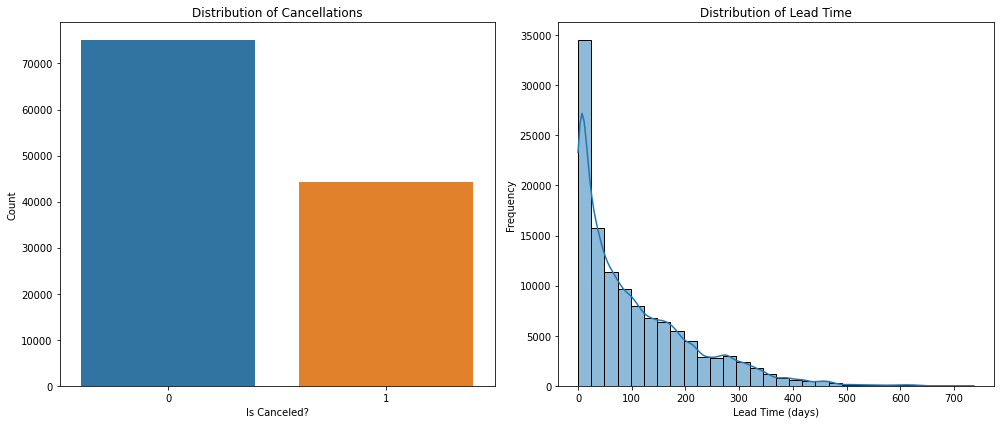

(           lead_time  arrival_date_week_number  arrival_date_day_of_month  \
 count  119390.000000             119390.000000              119390.000000   
 mean      104.011416                 27.165173                  15.798241   
 std       106.863097                 13.605138                   8.780829   
 min         0.000000                  1.000000                   1.000000   
 25%        18.000000                 16.000000                   8.000000   
 50%        69.000000                 28.000000                  16.000000   
 75%       160.000000                 38.000000                  23.000000   
 max       737.000000                 53.000000                  31.000000   
 
        stays_in_weekend_nights  stays_in_week_nights         adults  \
 count            119390.000000         119390.000000  119390.000000   
 mean                  0.927599              2.500302       1.856403   
 std                   0.998613              1.908286       0.579261   
 min    

In [18]:
plt.figure(figsize=(14, 6))

# Distribution of the target variable
plt.subplot(1, 2, 1)
sns.countplot(x='is_canceled', data=df)
plt.title('Distribution of Cancellations')
plt.xlabel('Is Canceled?')
plt.ylabel('Count')

# Distribution of the lead time
plt.subplot(1, 2, 2)
sns.histplot(df['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Descriptive statistics of numerical variables
desc_stats = df.describe()

# Check the proportion of cancellations
cancelation_rate = df['is_canceled'].mean()

desc_stats, cancelation_rate

## Exploratory Data Analysis (EDA) Observations:

### 1. Distribution of Cancellations:
- Approximately 37% of bookings were canceled.
- This seems like a reasonably balanced dataset which is good for modeling.

### 2. Distribution of Lead Time:
- Most bookings are made with a lead time of fewer than 100 days.
- There are some bookings with a very high lead time, which might be considered outliers or - particularly early bookings.

### 3. Descriptive Statistics:
- The average lead time is 104 days, but it has a large standard deviation of 106.86 days, indicating high variability in the data.
- Most guests do not have children or babies, as the mean is very low (0.10 and 0.008 respectively).
- The adr (Average Daily Rate) has a negative minimum value, which might indicate the presence of outliers or erroneous data.
- Most bookings do not require a parking space and do not have special requests as their means are closer to zero.

There are some significant variables are missing.
- 1) Price of room
- 2) Number of room
- 3) location of room (good view? etc)
- 4) Unique id
- 5) unique customer id